In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import math
from scipy.optimize import root


In [10]:
data = pd.read_excel('aol_data-20240702114233.xlsx')
data.head()

,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,...,M135,M136,M137,M138,M139,M140,M141,M142,M143,M144
0,1863,1614,2570,1685,2101,1811,2457,2171,2134,2502,...,14917,15046,15556,15893,16388,16782,16716,17033,16896,17689


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Columns: 144 entries, M1 to M144
dtypes: int64(144)
memory usage: 1.2 KB


In [12]:
data = pd.DataFrame(data)
data_new = data.transpose()

In [13]:
data_new = data_new.reset_index()
data_new


,index,0
0,M1,1863
1,M2,1614
2,M3,2570
3,M4,1685
4,M5,2101
...,...,...
139,M140,16782
140,M141,16716
141,M142,17033
142,M143,16896


In [14]:
data_new = data_new.rename(columns={'index':'fortnight'})
data_new = data_new.rename(columns={0:'Jumlah'})
data_new.head()


,fortnight,Jumlah
0,M1,1863
1,M2,1614
2,M3,2570
3,M4,1685
4,M5,2101


In [15]:
data_new.to_excel('data_new.xlsx', index=False)

In [16]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   fortnight  144 non-null    object
 1   Jumlah     144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


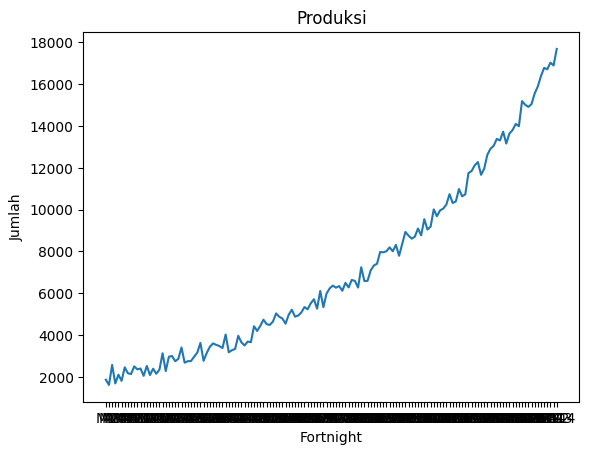

In [17]:
# visualisasi data
plt.plot(data_new['fortnight'], data_new['Jumlah'])
plt.xlabel('Fortnight')
plt.ylabel('Jumlah')
plt.title('Produksi')
plt.show()


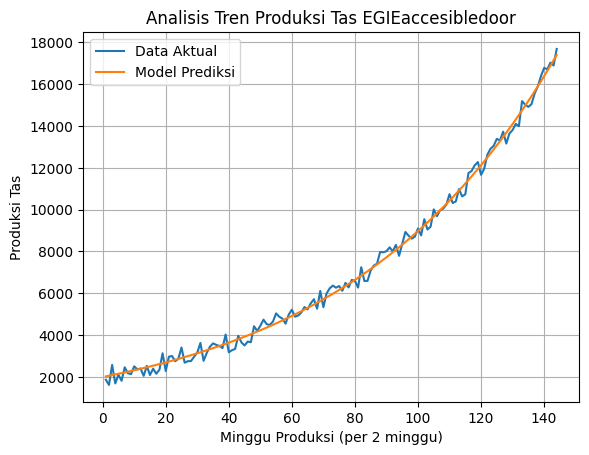

Produksi awal (P_0): 1991.311
Tingkat pertumbuhan eksponensial (k): 0.015


In [10]:
data = data_new['Jumlah']
data = data.values



fortnight = np.arange(1, len(data)+1)


# Fungsi objektif untuk regresi nonlinier
def objective(params, x, y):
    P_0, k = params
    P_hat = P_0 * np.exp(k * x)
    return np.sum((P_hat - y)**2)

# Parameter awal
params_0 = [data[0], 0.01]

# Regresi nonlinier
res = minimize(objective, params_0, args=(fortnight, data))

# Nilai parameter yang diperkirakan
P_0_hat = res.x[0]
k_hat = res.x[1]

# Model produksi tas yang diprediksi
def production_model(t):
    return P_0_hat * np.exp(k_hat * t)


plt.plot(fortnight, data, label='Data Aktual')
plt.plot(fortnight, production_model(fortnight), label='Model Prediksi')
plt.xlabel('Minggu Produksi (per 2 minggu)')
plt.ylabel('Produksi Tas')
plt.title('Analisis Tren Produksi Tas EGIEaccesibledoor')
plt.legend()
plt.grid(True)
plt.show()

# Hasil perhitungan
print(f"Produksi awal (P_0): {P_0_hat:.3f}")
print(f"Tingkat pertumbuhan eksponensial (k): {k_hat:.3f}")


In [11]:
# Parameter awal dari regresi nonlinier exponential
P_0 = 1991.31
k = 0.0151

# Fungsi prediksi produksi (numerik)
def production_approx(t):
    # Aproksimasi eksponensial menggunakan Seri Taylor
    def exp_taylor(x, n):
        if n == 0:
            return 1
        else:
            return x**n / np.math.factorial(n) + exp_taylor(x, n-1)

    # Perhitungan produksi aproksimasi
    production_approx = P_0 * (1 + k * t + (k**2 * t**2) / math.factorial(2) + (k**3 * t**3) / math.factorial(3) + (k**4 * t**4) / math.factorial(4))
    return production_approx

# Perhitungan produksi aproksimasi untuk beberapa waktu
t_values = np.arange(1, 144)  # Prediksi untuk 12 minggu ke depan
production_predictions = production_approx(t_values)

print("Prediksi Produksi Tas:")
for t, prediction in zip(t_values, production_predictions):
    print(f"Minggu {t}: {prediction:.3f}")


Prediksi Produksi Tas:
Minggu 1: 2021.607
Minggu 2: 2052.365
Minggu 3: 2083.591
Minggu 4: 2115.292
Minggu 5: 2147.475
Minggu 6: 2180.148
Minggu 7: 2213.318
Minggu 8: 2246.992
Minggu 9: 2281.179
Minggu 10: 2315.886
Minggu 11: 2351.120
Minggu 12: 2386.890
Minggu 13: 2423.204
Minggu 14: 2460.070
Minggu 15: 2497.496
Minggu 16: 2535.490
Minggu 17: 2574.062
Minggu 18: 2613.219
Minggu 19: 2652.970
Minggu 20: 2693.325
Minggu 21: 2734.291
Minggu 22: 2775.878
Minggu 23: 2818.095
Minggu 24: 2860.951
Minggu 25: 2904.456
Minggu 26: 2948.618
Minggu 27: 2993.448
Minggu 28: 3038.954
Minggu 29: 3085.147
Minggu 30: 3132.037
Minggu 31: 3179.633
Minggu 32: 3227.945
Minggu 33: 3276.983
Minggu 34: 3326.758
Minggu 35: 3377.281
Minggu 36: 3428.560
Minggu 37: 3480.608
Minggu 38: 3533.434
Minggu 39: 3587.050
Minggu 40: 3641.465
Minggu 41: 3696.692
Minggu 42: 3752.741
Minggu 43: 3809.623
Minggu 44: 3867.350
Minggu 45: 3925.933
Minggu 46: 3985.383
Minggu 47: 4045.712
Minggu 48: 4106.932
Minggu 49: 4169.054
Minggu

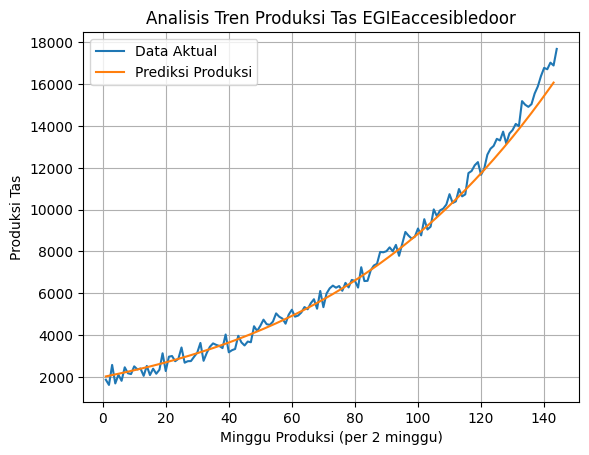

In [12]:
# bandingkan data aktual dengan prediksi
plt.plot(fortnight, data, label='Data Aktual')
plt.plot(t_values, production_predictions, label='Prediksi Produksi')
plt.xlabel('Minggu Produksi (per 2 minggu)')
plt.ylabel('Produksi Tas')
plt.title('Analisis Tren Produksi Tas EGIEaccesibledoor')
plt.legend()
plt.grid(True)
plt.show()


In [13]:
# Kapasitas maksimum gudang
max_capacity = 25000

# Fungsi prediksi produksi
def production_prediction(t):
    return P_0 * np.exp(k * t)

# Fungsi turunan prediksi produksi
def production_prediction_derivative(t):
    return P_0 * k * np.exp(k * t)

# Fungsi untuk mencari akar persamaan
def root_function(t):
    return production_prediction(t) - max_capacity

# Penyelesaian menggunakan metode Newton-Raphson
def newton_raphson(root_function, x0, tol=1e-6, max_iter=100):
    x = x0
    for _ in range(max_iter):
        if abs(root_function(x)) < tol:
            return x
        dx = -root_function(x) / production_prediction_derivative(x)  # Fix: Use production_prediction_derivative
        x += dx
    raise RuntimeError("Maximum iterations reached")

# Turunan fungsi prediksi
def production_prediction_derivative(t):
    return P_0 * k * np.exp(k * t)

# Mencari waktu prediksi
t_predicted = newton_raphson(root_function, 1)  # Asumsi awal: bulan ke-1

# Perhitungan waktu mulai membangun gudang
time_to_build = 13  # Bulan
start_building_time = t_predicted - time_to_build

# Menampilkan hasil
print(f"Prediksi waktu perlu membangun gudang baru: Minggu ke-{int(start_building_time)}")



Prediksi waktu perlu membangun gudang baru: Minggu ke-154
